In [5]:
import ccxt
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

from datetime import datetime
%matplotlib widget


import pandas_ta as ta

In [9]:
df = pd.read_json('data.json', lines=True)
df['time'] = pd.to_datetime(df['time'], unit='ms')
df.set_index('time', inplace=True)
df

,symbol,price
time,,
1970-01-20 12:58:12.674,BCHUSDT,302.00
1970-01-20 12:58:12.676,SOLUSDT,19.33
1970-01-20 12:58:12.677,LTCUSDT,110.53
1970-01-20 12:58:12.679,BCHUSDT,302.10
1970-01-20 12:58:12.681,SOLUSDT,19.33
...,...,...
1970-01-20 13:01:13.658,SOLUSDT,19.26
1970-01-20 13:01:13.660,LTCUSDT,106.78
1970-01-20 13:01:13.661,BCHUSDT,282.80


In [12]:
print(df['symbol'].unique())
df['symbol'].value_counts()

['BCHUSDT' 'SOLUSDT' 'LTCUSDT']


BCHUSDT    23569
SOLUSDT    23564
LTCUSDT    23560
Name: symbol, dtype: int64

<AxesSubplot:xlabel='time'>

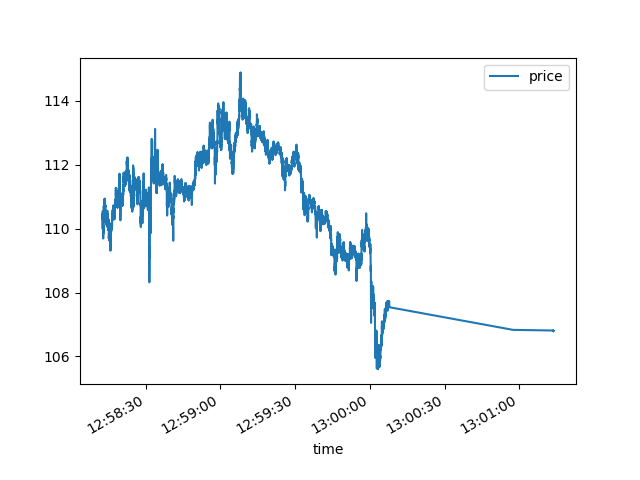

In [28]:
df[df['symbol']=="LTCUSDT"].plot()
# .plot.scatter(df)

<AxesSubplot:xlabel='time'>

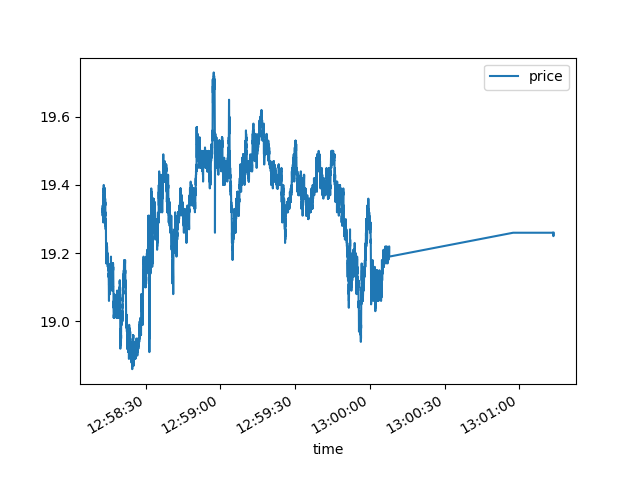

In [29]:
df[df['symbol']=="SOLUSDT"].plot()

<AxesSubplot:xlabel='time'>

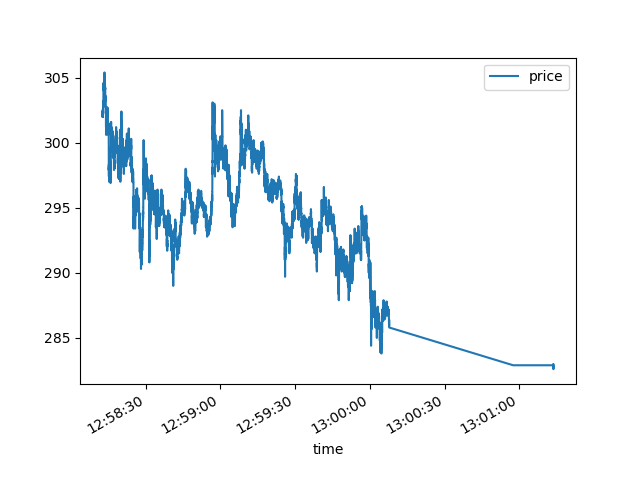

In [30]:
df[df['symbol']=="BCHUSDT"].plot()


KeyError: "None of [Float64Index([110.53,  110.5, 110.41, 110.42, 110.43, 110.39, 110.37, 110.34,\n              110.35, 110.37,\n              ...\n              106.82, 106.81,  106.8,  106.8,  106.8,  106.8, 106.79, 106.79,\n              106.78, 106.79],\n             dtype='float64', length=23560)] are in the [columns]"

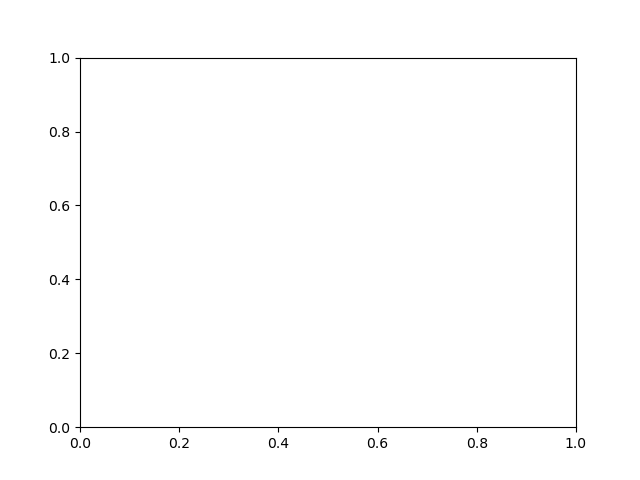

In [27]:
df.plot.scatter(x=df[df['symbol']=="LTCUSDT"]['price'], y=df[df['symbol']=="LTCUSDT"].index)
# df[df['symbol']=="LTCUSDT"].index